In [2]:
import math
import numpy as np
import random
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Perceptron Learning algorithm

In [3]:
classification_file = 'classification.txt'

In [4]:
classification_array = np.loadtxt(classification_file, delimiter=',')

In [5]:
perceptron_array = classification_array[:,:4]

In [65]:
class Linear_Classification:
    def __init__(self, array, alpha, max_iter):
        self.alpha = alpha #learning_rate
        self.array = array
        self.dimension = array.shape[1]-1
        self.data_numbers = array.shape[0]
        self.max_iter = max_iter
          
    def new_X(self):
        return np.hstack(((np.zeros([self.data_numbers,1])+1),self.array[:,:3]))
    
    def perceptron_learning(self):
        X = self.new_X()
        W = np.zeros([self.dimension+1,1])
        iterat = 0
        while iterat < self.max_iter:
            iterat += 1
            update = False
            for i in range(self.data_numbers):
                if np.dot(X[i,:], W) < 0 and self.array[i,3] == 1:
                    W = W + self.alpha * X[i,:].reshape(self.dimension+1,1)
                    update = True
                    #break
                elif np.dot(X[i,:], W) >= 0 and self.array[i,3] == -1:
                    W = W - self.alpha * X[i,:].reshape(self.dimension+1,1)
                    update = True
                    #break
            if not update:
                break
        print(iterat)
        return W
    
    def pocket_algorithm(self):
        X = self.new_X()
        W = np.zeros([self.dimension+1, 1])
        iterat = 0
        best_violated = self.data_numbers
        W_best = W
        violated = []
        while iterat < self.max_iter and violated != 0:
            iterat += 1
            count = 0
            violated_index = []
            for i in range(self.data_numbers):
                if np.dot(X[i,:], W) < 0 and self.array[i,3] == 1:
                    count += 1
                    violated_index.append(i)
                elif np.dot(X[i,:], W) >= 0 and self.array[i,3] == -1:
                    count += 1
                    violated_index.append(i)
            ind = random.choice(violated_index)
            #ind = violated_index[0]
            if np.dot(X[ind,:], W) < 0 and self.array[ind,3] == 1:
                W = W + self.alpha * X[ind,:].reshape(self.dimension+1,1)
            elif np.dot(X[ind,:], W) >= 0 and self.array[ind,3] == -1:
                W = W - self.alpha * X[ind,:].reshape(self.dimension+1,1)
            if count <= best_violated:
                best_violated = count
                W_best = W
            violated.append(count)
        plt.plot(violated)
        plt.show()
        return W_best
    
    def accuracy(self, W):
        X = self.new_X()
        count = 0
        for i in range(self.data_numbers):
            if np.dot(X[i,:], W) < 0 and self.array[i,3] == 1:
                count += 1
            elif np.dot(X[i,:], W) >= 0 and self.array[i,3] == -1:
                count += 1
        return 1 - count/self.data_numbers

In [44]:
perceptron = Linear_Classification(perceptron_array, 1, 7000)

In [45]:
W_perceptron = perceptron.perceptron_learning()

1238


In [46]:
print(W_perceptron)

array([[  0.        ],
       [ 93.99358666],
       [-75.3947041 ],
       [-56.31315876]])

In [47]:
print(perceptron.accuracy(W_perceptron))

1.0

### Pocket algorithm

In [12]:
pocket_array = np.hstack((classification_array[:,:3], classification_array[:,4:]))

In [66]:
pocket = Linear_Classification(pocket_array, 1, 7000)

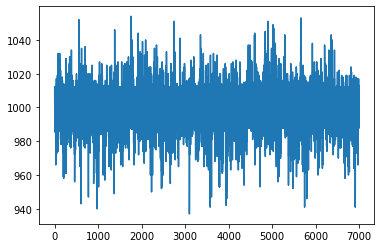

In [67]:
W_pocket = pocket.pocket_algorithm()

In [68]:
print(W_pocket)

array([[ 1.        ],
       [-0.92621796],
       [ 1.41772507],
       [ 0.78116361]])

In [69]:
print(pocket.accuracy(W_pocket))

0.494

### Logistic Regression

In [73]:
logistic_array = np.hstack((classification_array[:,:3], classification_array[:,4:]))

In [91]:
class Logistic_Regression:
    def __init__(self, array, alpha, max_iter):
        self.alpha = alpha #learning_rate
        self.array = array
        self.dimension = array.shape[1]-1
        self.data_numbers = array.shape[0]
        self.max_iter = max_iter
          
    def new_X(self):
        return np.hstack(((np.zeros([self.data_numbers,1])+1),self.array[:,:3]))
    
    def sigmoid(self,s):
        return (1 / (1+np.exp(-s)))
    
    def logistic_learning(self):
        W = np.random.random_sample((self.dimension+1, 1))
        Y = self.array[:,3:]
        X = self.new_X()
        iterat = 0
        while iterat < self.max_iter:
            iterat += 1
            degree = np.multiply((np.dot(X,W)),Y)
            delta_Ein=np.sum((np.multiply(Y.T,X.T) / (1 + np.exp(degree)).T).T,axis=0)
            delta_Ein=delta_Ein / self.data_numbers
            delta_Ein = delta_Ein.reshape(4,1)
            W += self.alpha * delta_Ein
        return W

    def accuracy(self, W):
        X = self.new_X()
        count = 0
        for i in range(self.data_numbers):
            if np.dot(X[i,:], W) < 0 and self.array[i,3] == 1:
                count += 1
            elif np.dot(X[i,:], W) >= 0 and self.array[i,3] == -1:
                count += 1
        return 1 - count/self.data_numbers

In [112]:
l = Logistic_Regression(logistic_array, 0.1, 7000)

In [113]:
W_logistic = l.logistic_learning()

In [114]:
W_logistic

array([[-0.03158647],
       [-0.17764228],
       [ 0.11450547],
       [ 0.07675847]])

In [115]:
l.accuracy(W_logistic)

0.5295000000000001

### Linear Regression

In [12]:
linear_regression_file = 'linear-regression.txt'

In [13]:
linear_regression_array = np.loadtxt(linear_regression_file, delimiter=',')

In [15]:
class Linear_Regression:
    def __init__(self, array):
        self.array = array
        self.dimension = array.shape[1]-1
        self.data_numbers = array.shape[0]
          
    def new_X(self):
        return np.hstack(((np.zeros([self.data_numbers,1])+1),self.array[:,:2]))
    
    def fit(self):
        X = self.new_X()
        Y = self.array[:,2:]
        epsilon = LA.inv(np.dot(X.T,X))
        W_temp = np.dot(epsilon,X.T)
        return np.dot(W_temp,Y)

In [16]:
li = Linear_Regression(linear_regression_array)

In [17]:
li.fit()

array([[0.01523535],
       [1.08546357],
       [3.99068855]])